In [1]:
import pandas as pd
import os

In [2]:
from pathlib import Path
import math

In [3]:
bigCorpus = pd.read_csv('../rawData/BigCorpus.csv', engine='python', encoding='utf-8')
commentsAndLabels = bigCorpus[['打分', '评论内容']]

In [4]:
%matplotlib inline

In [5]:
commentsAndLabels.head()

,打分,评论内容
0,1,我已经不想说什么了，死都不发信息给我
1,1,***游戏抄袭还抄的这么烂也是无语了
2,1,有一个bug，当爆牌选卡时往从右往左滑动时总会回到第一张卡的位置，根本拖不到后面，太烦人了。
3,1,boss好难打啊，这游戏真的对新人很不友好
4,1,本想给五星的看了下一星评论才明白我有多蠢╰(*´︶`*)╯


In [6]:
commentsAndLabels['StrLength'] = commentsAndLabels['评论内容'].str.len()

/home/deep/pythonenv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
commentsAndLabels.head()

,打分,评论内容,StrLength
0,1,我已经不想说什么了，死都不发信息给我,18
1,1,***游戏抄袭还抄的这么烂也是无语了,18
2,1,有一个bug，当爆牌选卡时往从右往左滑动时总会回到第一张卡的位置，根本拖不到后面，太烦人了。,46
3,1,boss好难打啊，这游戏真的对新人很不友好,21
4,1,本想给五星的看了下一星评论才明白我有多蠢╰(*´︶`*)╯,29


In [47]:
commentsAndLabels.sort_values(by=['StrLength'], inplace=True)

/home/deep/pythonenv/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
import seaborn as sns

In [13]:
commentstats = commentsAndLabels['StrLength'].value_counts()

In [14]:
commentsAndLabels.describe()

,打分,StrLength
count,186694.000000,186694.000000
mean,3.623341,111.254127
std,1.476081,193.505027
min,1.000000,15.000000
25%,3.000000,25.000000
50%,4.000000,47.000000
75%,5.000000,111.000000
max,5.000000,10550.000000


In [15]:
sample = commentstats[:140]
sample

15     5612
16     5187
17     4962
18     4803
19     4524
20     4297
21     3890
22     3769
23     3597
24     3380
25     3186
26     2997
27     2865
28     2855
30     2670
29     2652
31     2470
32     2438
33     2281
34     2256
35     2195
37     2072
36     2020
38     1919
39     1835
40     1781
41     1712
44     1658
42     1633
43     1626
       ... 
130     319
125     312
129     310
127     298
128     297
123     291
131     290
137     285
134     284
126     283
136     283
139     271
135     270
138     270
133     266
142     266
141     260
144     253
143     253
140     241
153     239
145     239
148     238
146     232
152     231
150     227
157     227
147     227
159     226
149     225
Name: StrLength, Length: 140, dtype: int64

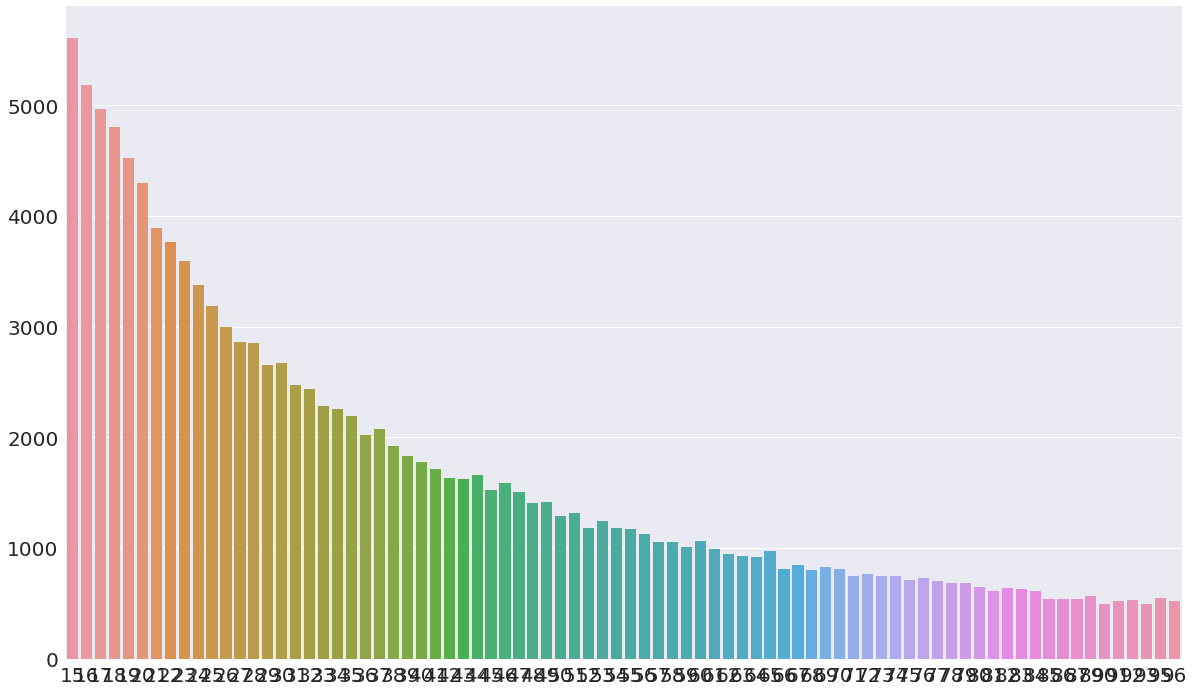

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
sns.set(font_scale=2)
sns.barplot(sample.index[:80], sample.values[:80])

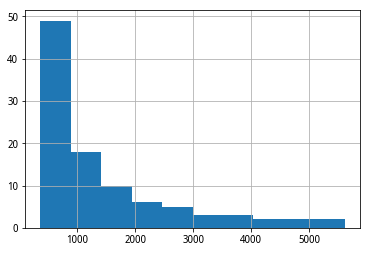

In [76]:
commentsAndLabels['StrLength'].value_counts().iloc[:100].hist()

In [9]:
outcsv = pd.DataFrame()
outcsv['label'] = commentsAndLabels['打分']
outcsv['content'] = commentsAndLabels['评论内容']

In [115]:
outcsv

,label,content
94827,5,内测玩到现在，不管怎么样，五星
118797,3,游戏的新手指印和可玩模式有欠缺
135844,5,好玩 估计可以玩很多天不会腻~
168164,4,四月末了，是不是要改成五月份呀
47763,4,什么都好，就是电池太难耍刷到了
168169,4,具体是4月几号安卓可以下载啊？
147125,2,为什么我这手机玩的时候是黑白？
98196,4,从网易扣的一星，为了从前的MC
98200,4,为什么没有音乐？唱片也没有声音
61821,5,女朋友推荐玩的 很赞哦


In [10]:
outcsv = outcsv[['content', 'label']]
#outcsv.to_csv('corpus.csv', sep='\t', index=None, header=None)
txt = out['content']
txt.to_csv('')

In [117]:
outcsv

,content,label
94827,内测玩到现在，不管怎么样，五星,5
118797,游戏的新手指印和可玩模式有欠缺,3
135844,好玩 估计可以玩很多天不会腻~,5
168164,四月末了，是不是要改成五月份呀,4
47763,什么都好，就是电池太难耍刷到了,4
168169,具体是4月几号安卓可以下载啊？,4
147125,为什么我这手机玩的时候是黑白？,2
98196,从网易扣的一星，为了从前的MC,4
98200,为什么没有音乐？唱片也没有声音,4
61821,女朋友推荐玩的 很赞哦,5


In [122]:
out = pd.read_csv('corpus.csv', engine='python', encoding='utf-8', sep='\t', header=None)

In [123]:
out

,0,1
0,内测玩到现在，不管怎么样，五星,5
1,游戏的新手指印和可玩模式有欠缺,3
2,好玩 估计可以玩很多天不会腻~,5
3,四月末了，是不是要改成五月份呀,4
4,什么都好，就是电池太难耍刷到了,4
5,具体是4月几号安卓可以下载啊？,4
6,为什么我这手机玩的时候是黑白？,2
7,从网易扣的一星，为了从前的MC,4
8,为什么没有音乐？唱片也没有声音,4
9,女朋友推荐玩的 很赞哦,5
